# Continuous Reprocessing Mass Balance

SaltProc keeps the core mass constant by having the thorium feed flow add in whatever material is removed such that a constant mass is maintained. This approach works well for batchwise reprocessing.

For continuous reprocessing, the mass can be balanced at the end of each depletion step to have balanced mass, which is a way of adding batchwise reprocessing to continuous reprocessing. If only continuous reprocessing is used, a balanced mass is not achievable without steady state. However, in the MSBR, only a partial steady state is achieved, so exact mass balance is not fully achievable.

## Example

Below is an example of mass balancing using continuous reprocessing.

- Assumes a two element system where each only has a single isotope.
- The isotopes are called $x$ and $y$.
- Both elements are fission products of the feed material being added.
- Both elements are continuously removed while the feed is continuously added
- Only feed material is present initially
- The feed has a constant input rate
- All isotopes are only formed through fission and only leave by reprocessing

The Bateman equations are as follows:

$$\frac{dN_x}{dt} = \phi \sigma_x \gamma_x N_{feed} - \lambda_{r, x} N_x$$

$$\frac{dN_y}{dt} = \phi \sigma_y \gamma_y N_{feed} - \lambda_{r, y} N_y$$

$$\frac{dN_{feed}}{dt} = \lambda_{feed} - \phi \sigma_x N_{feed} - \phi \sigma_y N_{feed}$$


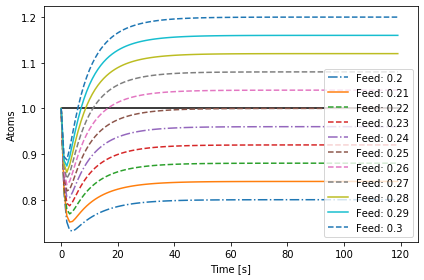

In [1]:
import numpy as np
import matplotlib.pyplot as plt

end_time = 120
gamma_x = 0.2
gamma_y = 0.8
phi = 1
sig_x = 0.5
sig_y = 0.5
lam_x = 0.1
lam_y = 0.2
N_feed_0 = 1
ts = np.arange(0, end_time, 1)
x = phi * sig_x
y = phi * sig_y

# This is the value we can freely change, the feed rate
dx = 0.01
lam_f_s = np.arange(0.2, 0.3+dx, dx)
lines = ["-","--","-.",":"]
for lam_f in lam_f_s:
    sum_list = list()
    line_style = lines[np.random.randint(0, len(lines) - 1)]
    for t in ts:
        N_feed = N_feed_0 * np.exp(-t * (x + y)) + lam_f / (x+y) * (1 - np.exp(-t * (x+y)))
        a = x * gamma_x
        b = lam_x
        c = a / (1-b) - (a/b + a / (1-b)) * lam_f
        N_x = - a * lam_f * np.exp(-t) / (b-1) + a * lam_f / (b-1) - a * lam_f / ((b-1)*b) + (a*np.exp(-t))/(b-1) + c * np.exp(-b * t) 
        a = y * gamma_y
        b = lam_y
        c = a / (1-b) - (a/b + a / (1-b)) * lam_f
        N_y = - a * lam_f * np.exp(-t) / (b-1) + a * lam_f / (b-1) - a * lam_f / ((b-1)*b) + (a*np.exp(-t))/(b-1) + c * np.exp(-b * t) 
        sum_val = N_feed + N_x + N_y
        sum_list.append(sum_val)
    plt.plot(ts, sum_list, line_style, label=f'Feed: {round(lam_f, 3)}')
plt.hlines(1, 0, end_time)
plt.ylabel('Atoms')
plt.xlabel('Time [s]')
plt.legend()
plt.tight_layout()
plt.show()


It can be seen in this figure that a reprocessing constant of 0.25 for the feed will allow for the mass to be the same as the initial state after enough time. However, for a more complex system, the time taken until the mass reaches this steady state value is likely much longer. Additionally, there is also still a region of tim during which the mass is not balanced, which in this case lasts for ~40 seconds. This is a short amount of time, but considering the simplicity of the system analyzed here, it could be much longer in more complex systems.